In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurements = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis
### Design a query to retrieve the last 12 months of precipitation data and plot the results

In [10]:
# Calculate the date 1 year ago from the last data point in the database
# the last date is 2017-08-23; the last year date starts on 2016-08-23
last_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
rain = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date > last_year).\
    order_by(Measurements.date.desc()).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain).set_index('date')
rain_df.head()

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


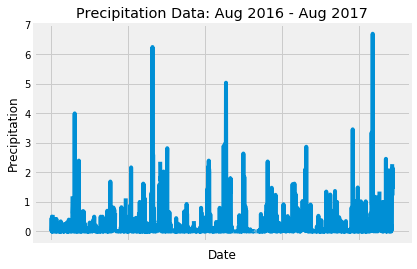

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot(legend=False)

plt.title("Precipitation Data: Aug 2016 - Aug 2017")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.savefig("Precipitation")




In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_summary = rain_df.describe()
rain_summary

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset
station_count = session.query(Station).count()
print(f'There are {station_count} stations in the table.')

There are 9 stations in the table.


In [14]:
active_stations = session.query(Measurements.station, func.count(Measurements.station)).group_by(
    Measurements.station).order_by(func.count(Measurements.station).desc()).all()

for x, y in active_stations:
    print(f'Station {x} had {y} weather observations.')

Station USC00519281 had 2772 weather observations.
Station USC00519397 had 2724 weather observations.
Station USC00513117 had 2709 weather observations.
Station USC00519523 had 2669 weather observations.
Station USC00516128 had 2612 weather observations.
Station USC00514830 had 2202 weather observations.
Station USC00511918 had 1979 weather observations.
Station USC00517948 had 1372 weather observations.
Station USC00518838 had 511 weather observations.


In [30]:
most_active = session.query(Measurements.station).\
    group_by(Measurements.station).\
    order_by(func.count(Measurements.station).\
    desc()).first()

f'The most active station is {most_active}.'
    
    
    
    

"The most active station is ('USC00519281',)."

Text(0.5, 1.0, 'Station USC00519281 Observation Data')

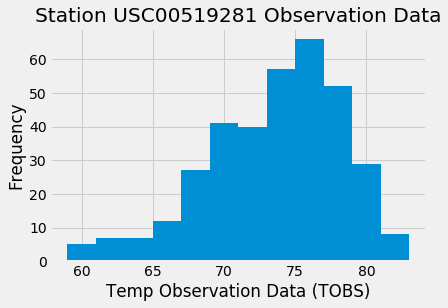

In [33]:
tobs = session.query(Measurements.date, Measurements.tobs).\
    filter(Measurements.date > last_year).\
    filter(Measurements.station == "USC00519281").\
    order_by(Measurements.date.desc()).all()

tobs_df = pd.DataFrame(tobs)
# tobs_df.head()

plt.hist(tobs_df['tobs'], bins=12)
plt.ylabel("Frequency")
plt.xlabel("Temp Observation Data (TOBS)")
plt.title("Station USC00519281 Observation Data")